# Bank Campaign A/B Test Analysis

This project utilized SAS and basic exploratory data analysis queries along with statistical methods to examine group characteristics and their corresponding responses. It focuses on analyzing the effectiveness of two marketing campaigns (Group A and Group B) through an A/B test with the main objective to identify factors that influence customer conversion and determine which campaign drives better results.

A dataset of 1,500 customers who were part of the A/B test were utilized with the primary variable being customer response to the bank’s offer. The key data variables analyzed include:

- group: *campaign group (A or B) each customer received*
- response: *whether the customer responded to the offer (1 = Yes, 0 = No)*
- balance: *customer’s account balance*
- age
- job: *customer's occupation, with categories like Admin, Blue-Collar, Entrepreneur, Retired, Student, and Technician*
- marital: *customer’s marital status (Divorced, Married, Single)*

Statistical tests like t-tests, ANOVA, GLM, and logistic regression were used to evaluate the data. Gathered insights will help the bank optimize future campaigns by targeting the right customer segments.

# Loading data

In [ ]:
proc import datafile='/home/u63574237/abtest/bank_ab_test_data.csv'
	out=bank_ab_test_data
	dbms=csv
	replace;

In [ ]:
title "First 10 Rows of the Bank A/B Test Dataset";
proc print data=bank_ab_test_data (obs=10);

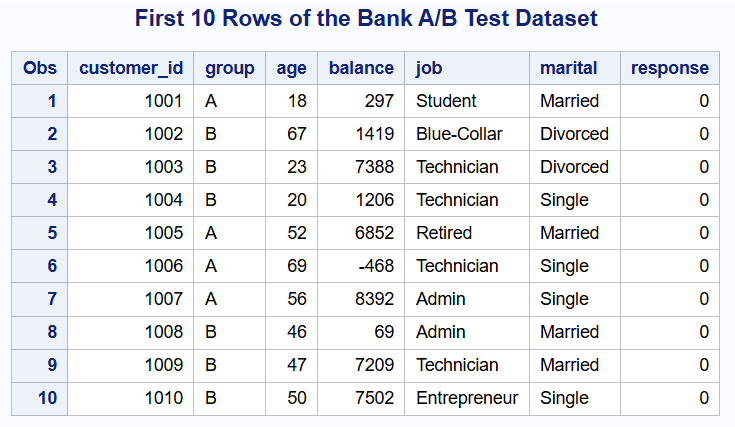

---

# Exploratory data analysis

The preliminary analysis revealed some trends in the customer data for the A/B test campaign.

- Average account balance between Group A and Group B was nearly identical with both groups showing mean account balances close to 5,070. This suggests that the campaign groups are relatively balanced in terms of customer wealth.

- The age variable demonstrated that both groups have a broad range of ages but with no significant difference in the age distribution between the two groups which indicates that age did not play a major role in the campaign’s response rate.

- Regarding marital status, most customers were either married or single, with a small portion being divorced. This demographic was slightly more relevant to the campaign, with divorced individuals showing a stronger likelihood to respond.

- The job type variable showed more variation but it did not appear to significantly impact the overall response rate. However, certain job types such as retired individuals had a lower probability of responding to the campaign.

- The distribution of response variable (yes/no) across the two groups indicated that those who received the new campaign as had a higher percentage of positive responses compared to those who received the standard ad, although the difference was not large.

In [ ]:
/** Identifying missing values, distribution, and overall trends **/

title "Summary Statistics for Age and Balance";
proc means data=bank_ab_test_data N MEAN STD MIN MAX;
	VAR age balance;

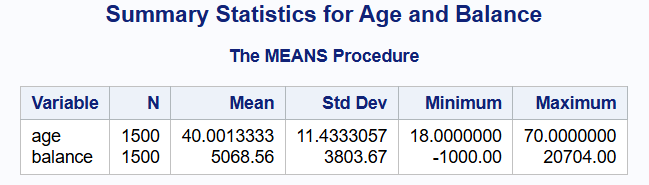

In [ ]:
title "Frequency Distribution of Group, Response, Job, and Marital Status";
proc freq data=bank_ab_test_data;
   tables group response job marital / nocum norow nopercent;
run;

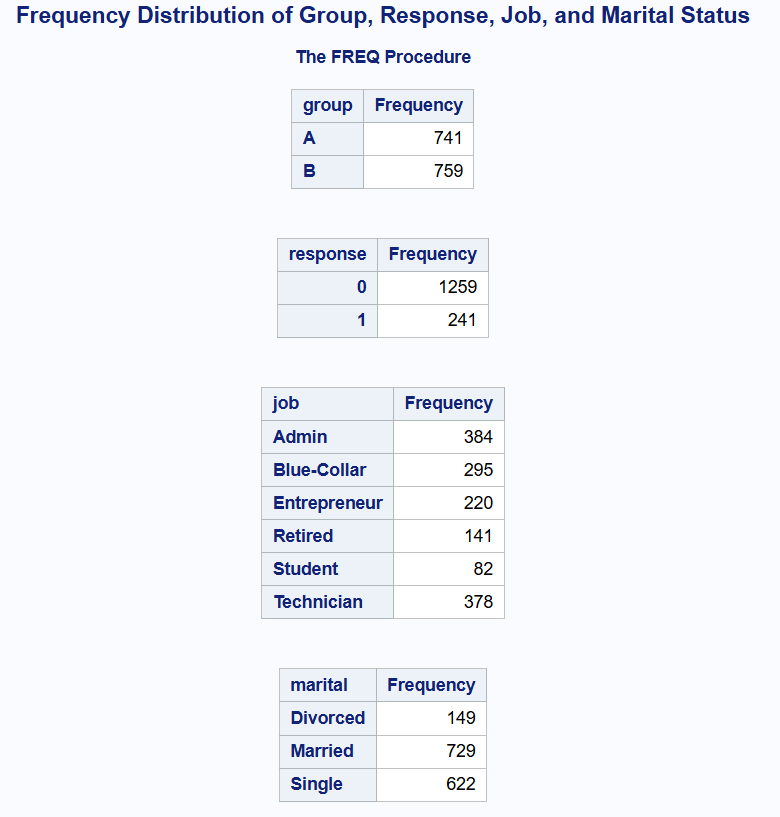

In [ ]:
/** Applying chi square to compare conversion rates per group ** /
/** Chi square test - used to compare the observed values in your data to the
expected value that you would see if the null hypothesis is true (JMP, n.d.) **/

title "Conversion Rate between A vs B using Chi Square Test"
proc freq data=bank_ab_test_data;
	tables group*response / chisq;

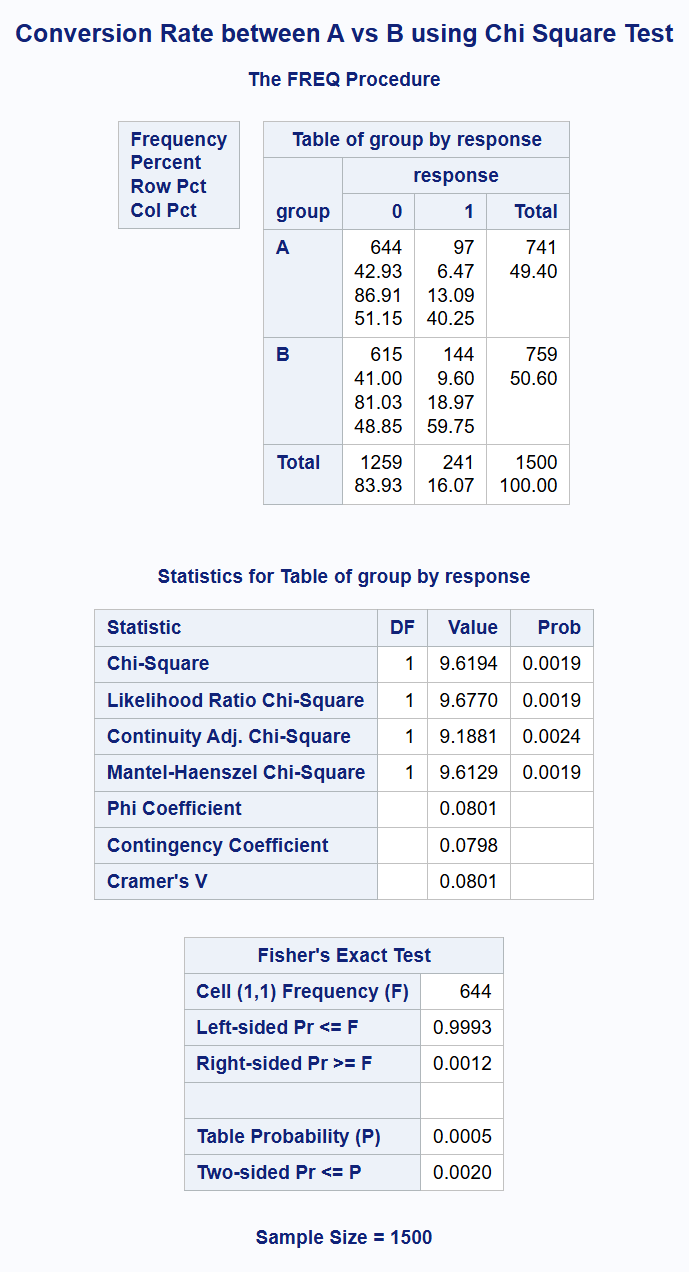

In [ ]:
/** Age distribution between groups **/
title "Age Distribution per Group between A vs B";
proc sgplot data=bank_ab_test_data;
	histogram age / group=group;

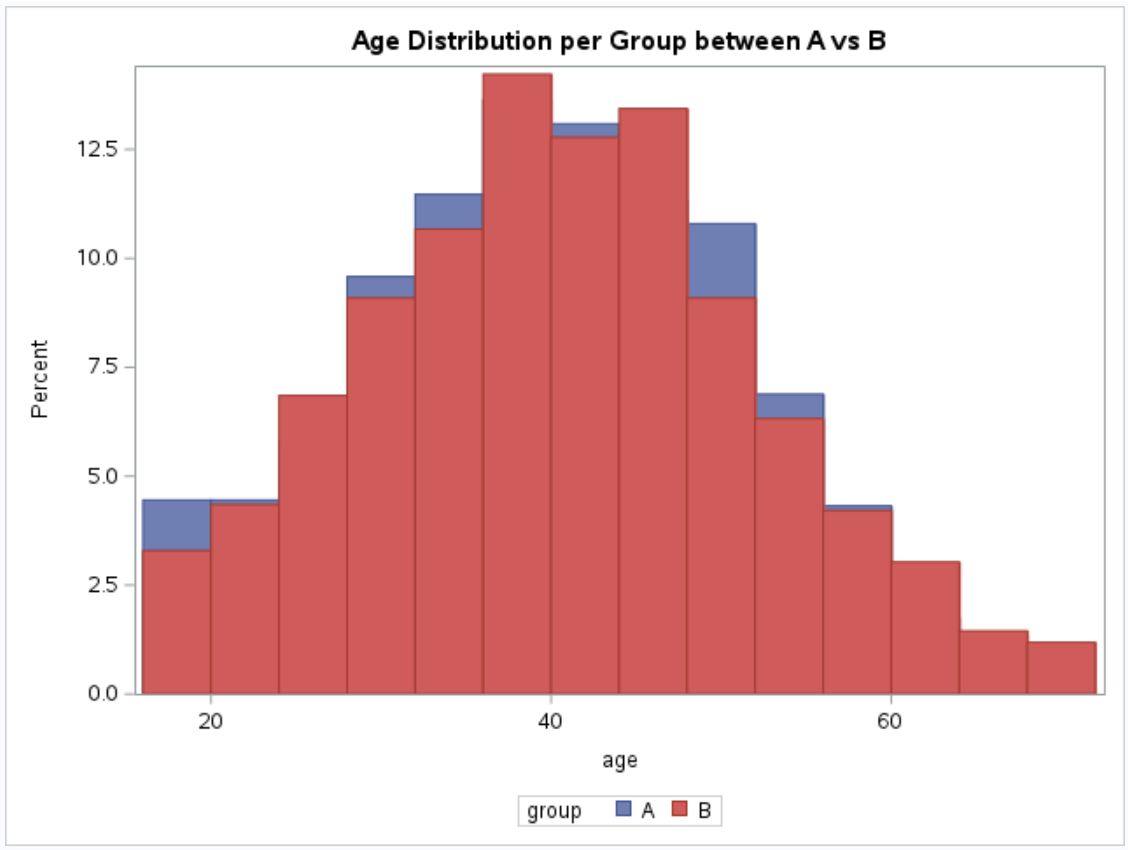

In [ ]:
title "Bank account balance distribution between responders and non-responders";
proc means data=bank_ab_test_data;
	class response;
	var balance;

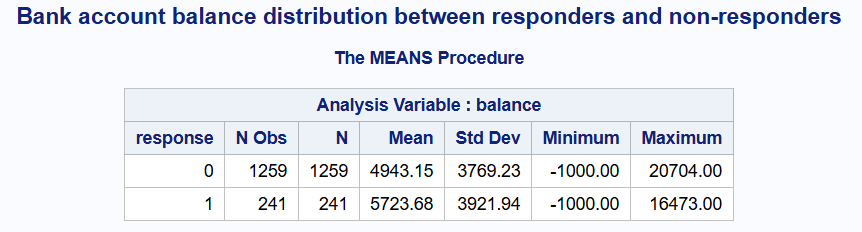

In [ ]:
title "Job Distribution between A vs B";
proc freq data=bank_ab_test_data;
	tables job*group / NOCOL NOPERCENT;

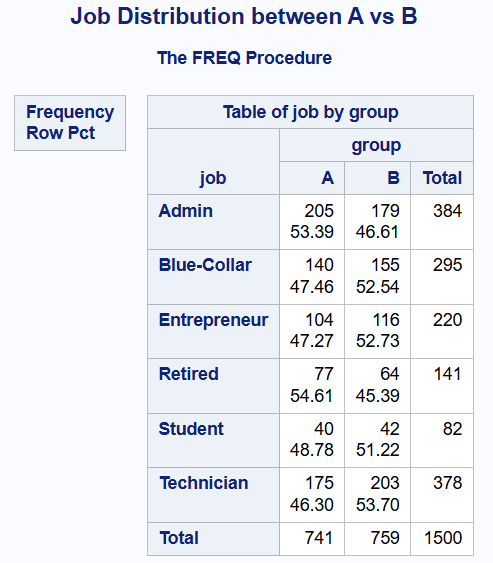

------------

# A/B Testing

## Using T-test

The analysis shows that there is no meaningful difference in the average account balance between customers in Group A and Group B. Group A's average balance is 5,071.20 while Group B's is 5,066.00, a difference of just 5.17. The statistical test confirms that this gap is not significant, meaning the campaign type did not influence how much money customers have in their accounts.

Additionally, a variance test shows that both groups have similar levels of balance variation, proving that any difference is just random chance. In business terms, this means the campaign itself did not attract customers with higher or lower balances. Instead, other factors like customer demographics or banking habits may play a bigger role.

In [ ]:
proc ttest data=bank_ab_test_data;
	class group;
	var balance;

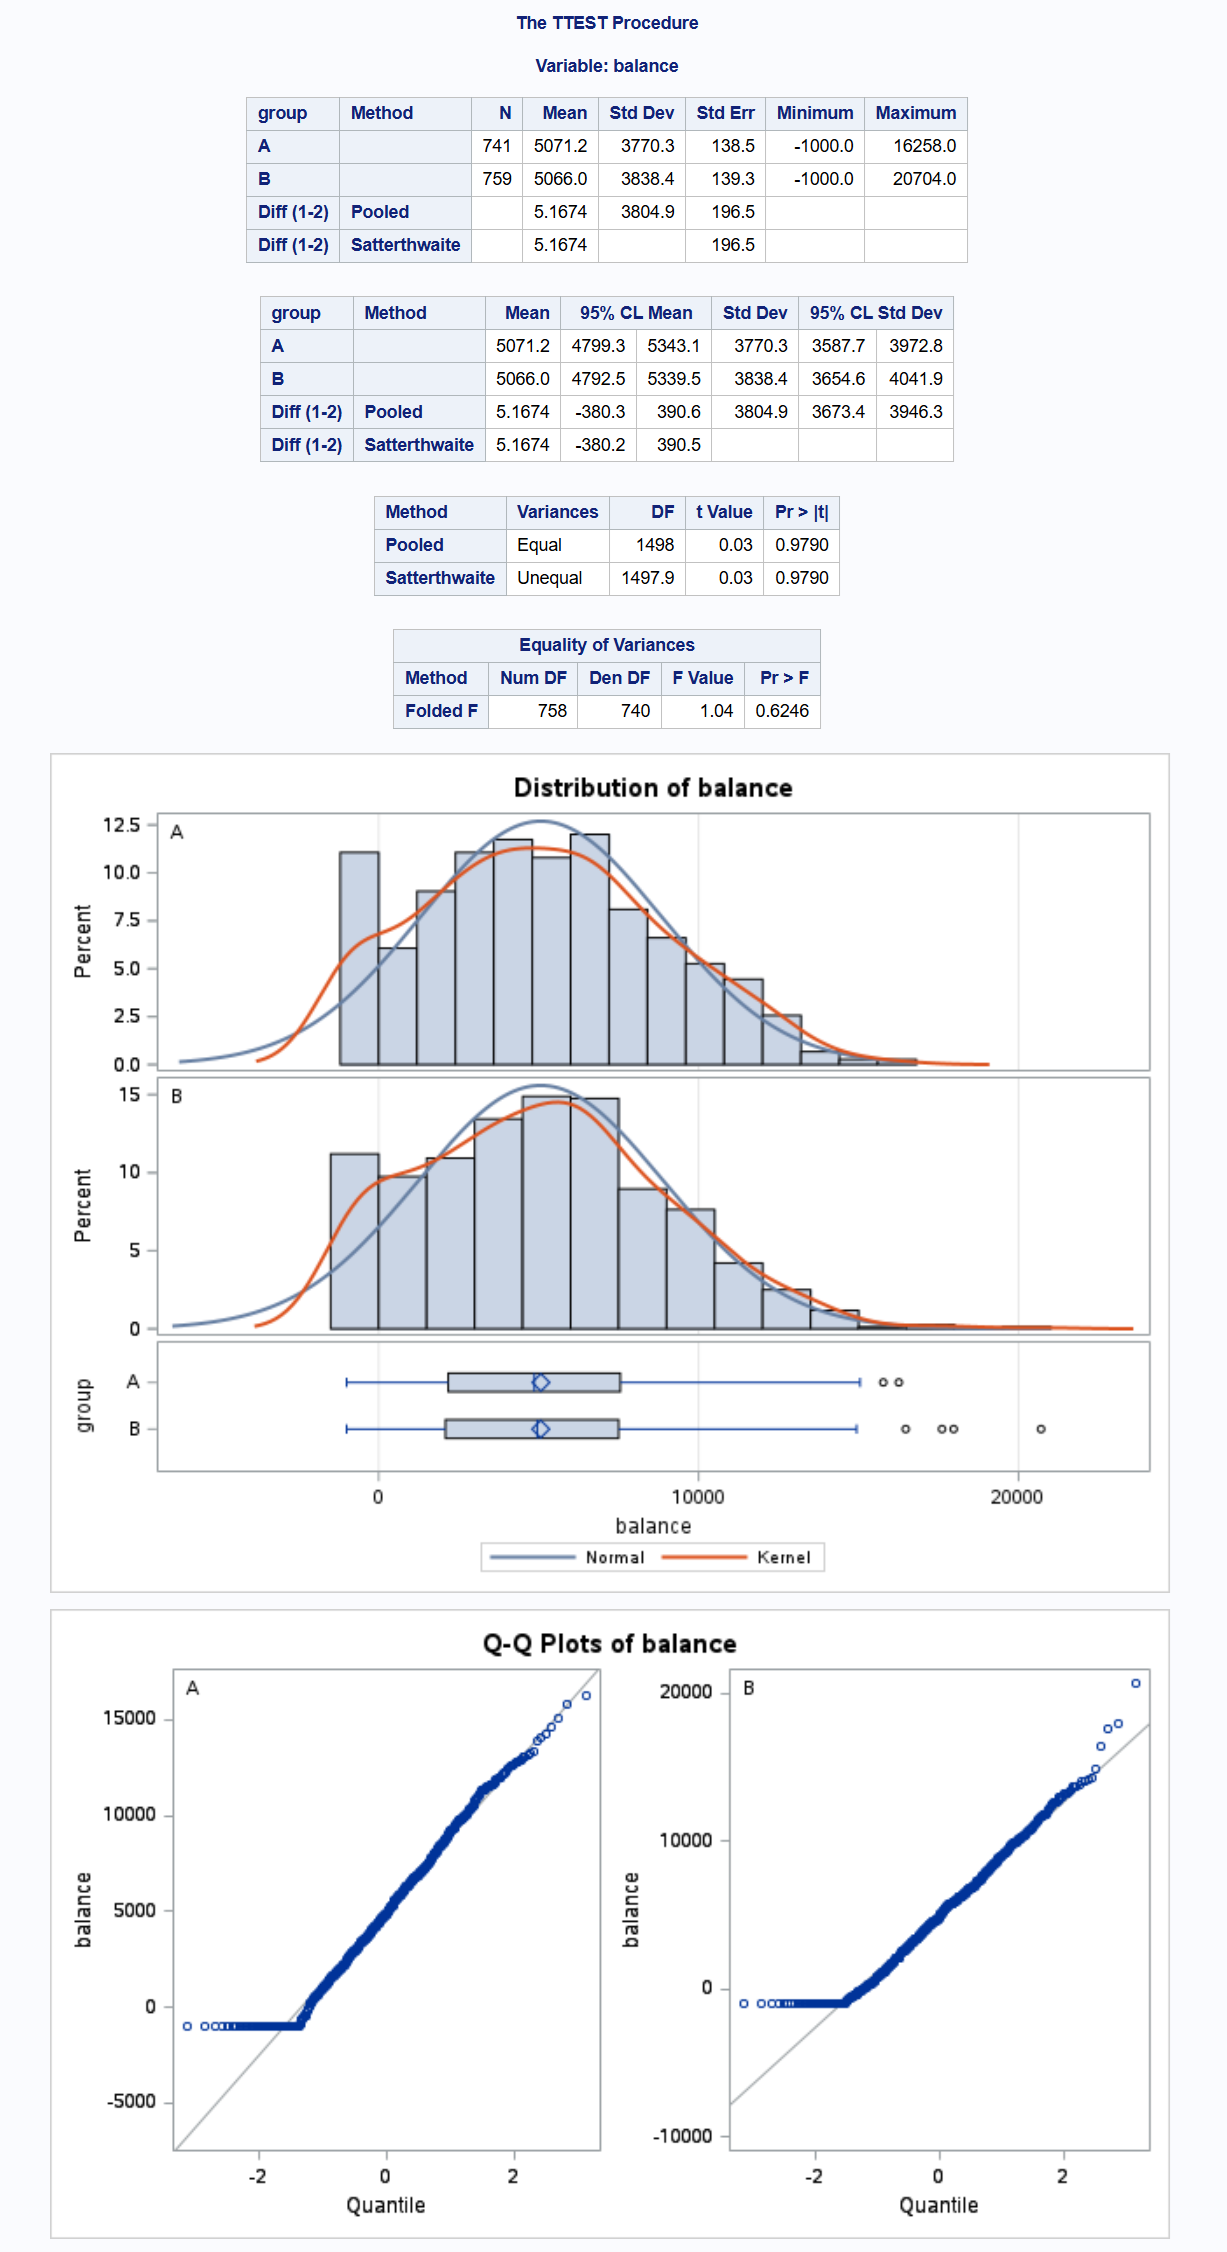

## Using ANOVA

The analysis shows that factors like a customer’s job, age, marital status, or which campaign group they’re in *do not affect how much money they have* in their account.

Less than 1% of the difference in balances can be explained by these details so the variations seem mostly random. Marital status almost showed an effect but it wasn’t strong enough to be reliable. The Tukey test also found that any differences between groups were too small to matter.

For businesses, this means that targeting customers based on these factors won’t help much in predicting or increasing account balances. Instead, it would be better to look at things like income, spending habits, or credit history to make more informed decisions.

In [ ]:
proc glm data=bank_ab_test_data;
	class group job marital;
	model balance = group age job marital;
	means group / TUKEY;

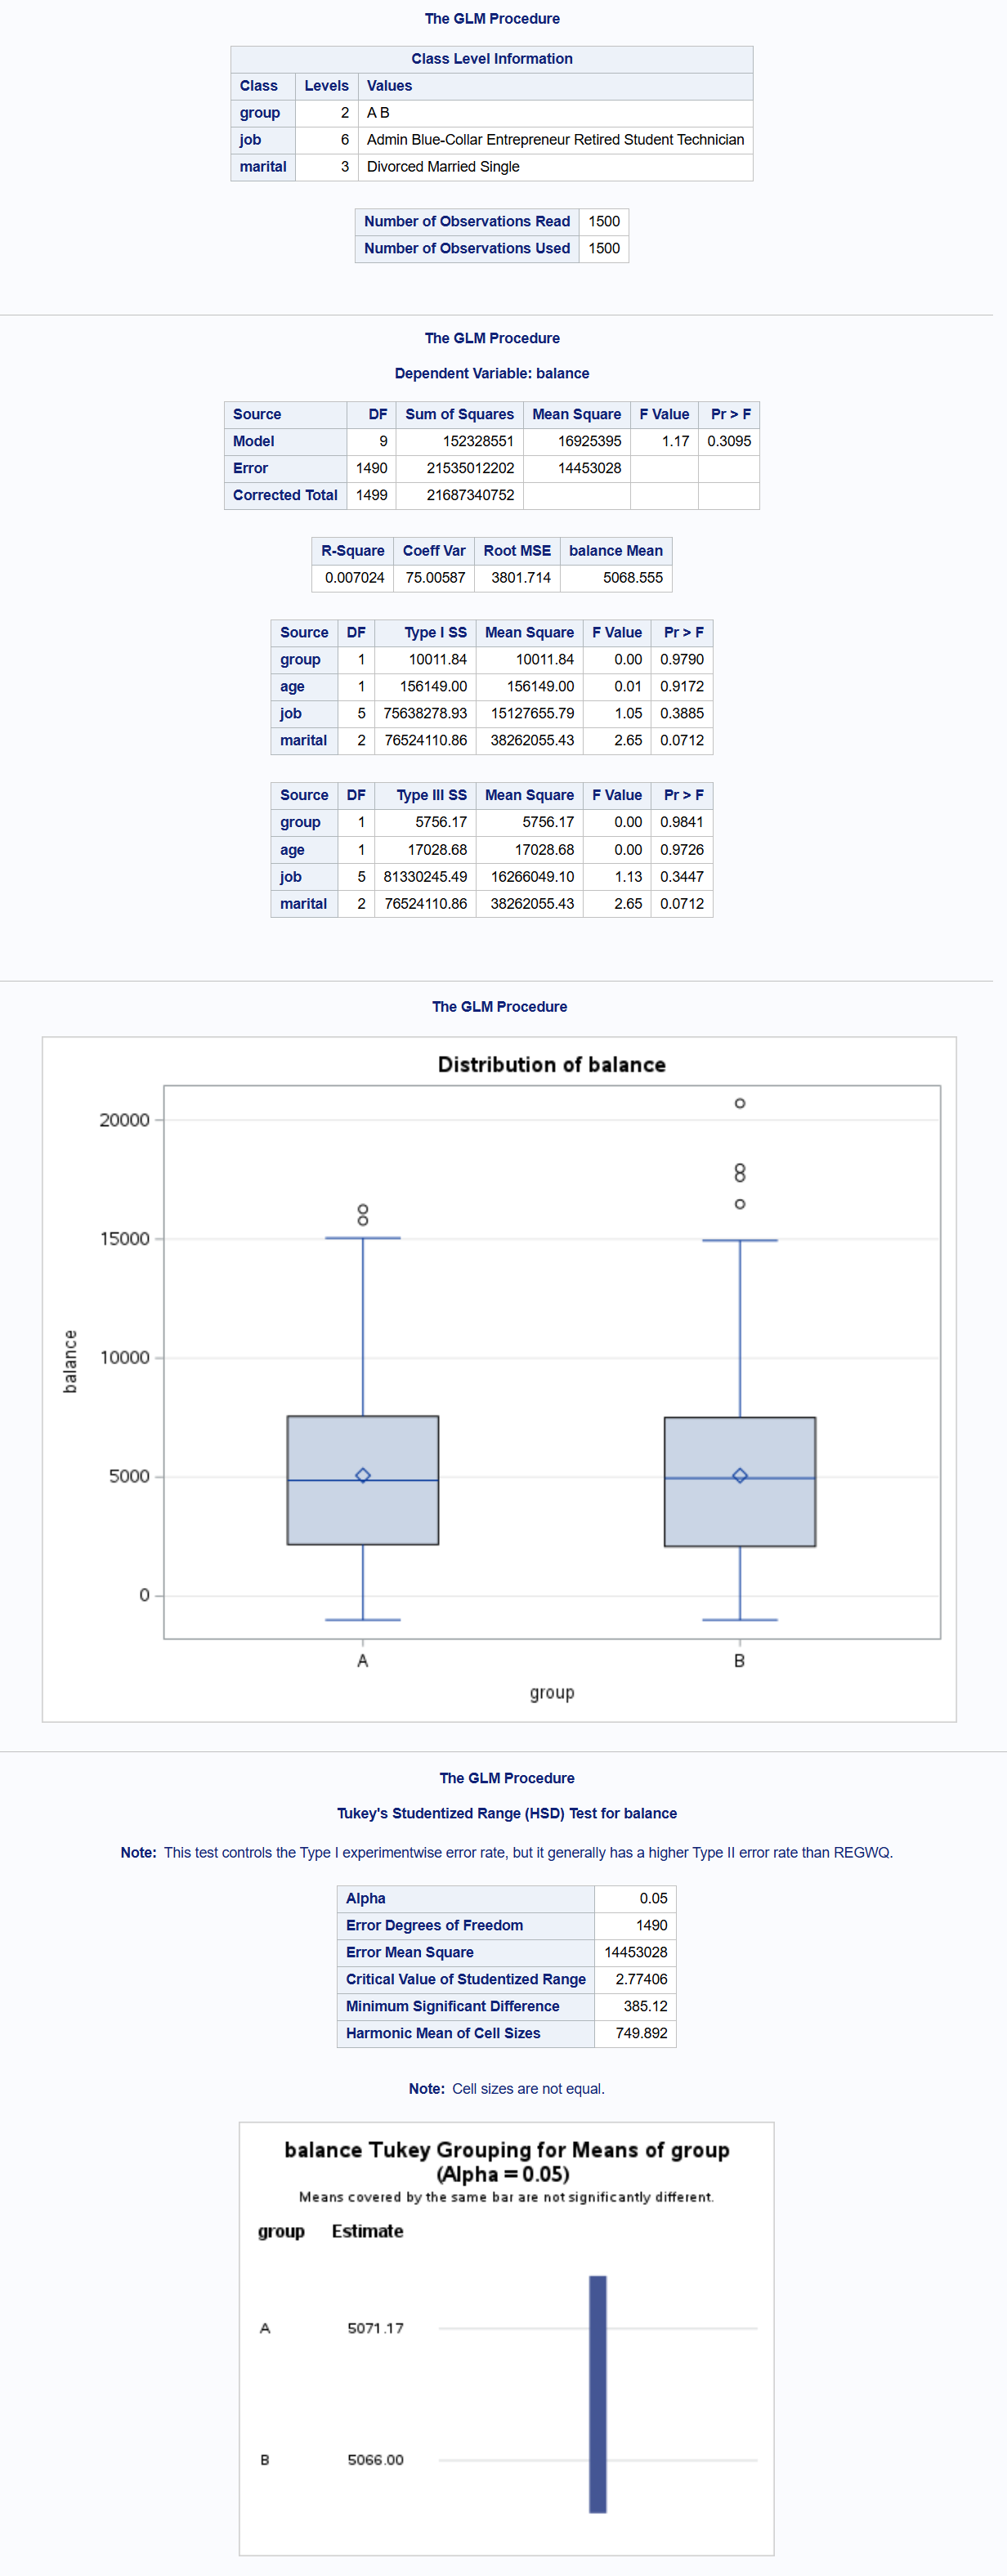

## Using Logistic Regression

- *Customers in who have received the new campaign (Group B) are more likely to respond to the offer* than those with the standard ad (Group A). Group B customers are about 1.5 times more likely to convert than those in Group A.
- *Older customers* also tend to respond more while the balance amount has a very small impact.
- *Divorced customers* are twice as likely to respond compared to single customers.
- Job type doesn't seem to matter much.

In short, future campaigns should focus on **Group B**, **older customers**, and **divorced individuals** to boost conversion rates.

In [ ]:
proc logistic data=bank_ab_test_data;
	class group(ref='A') job marital;
	model response(event='1') = group age balance job marital;

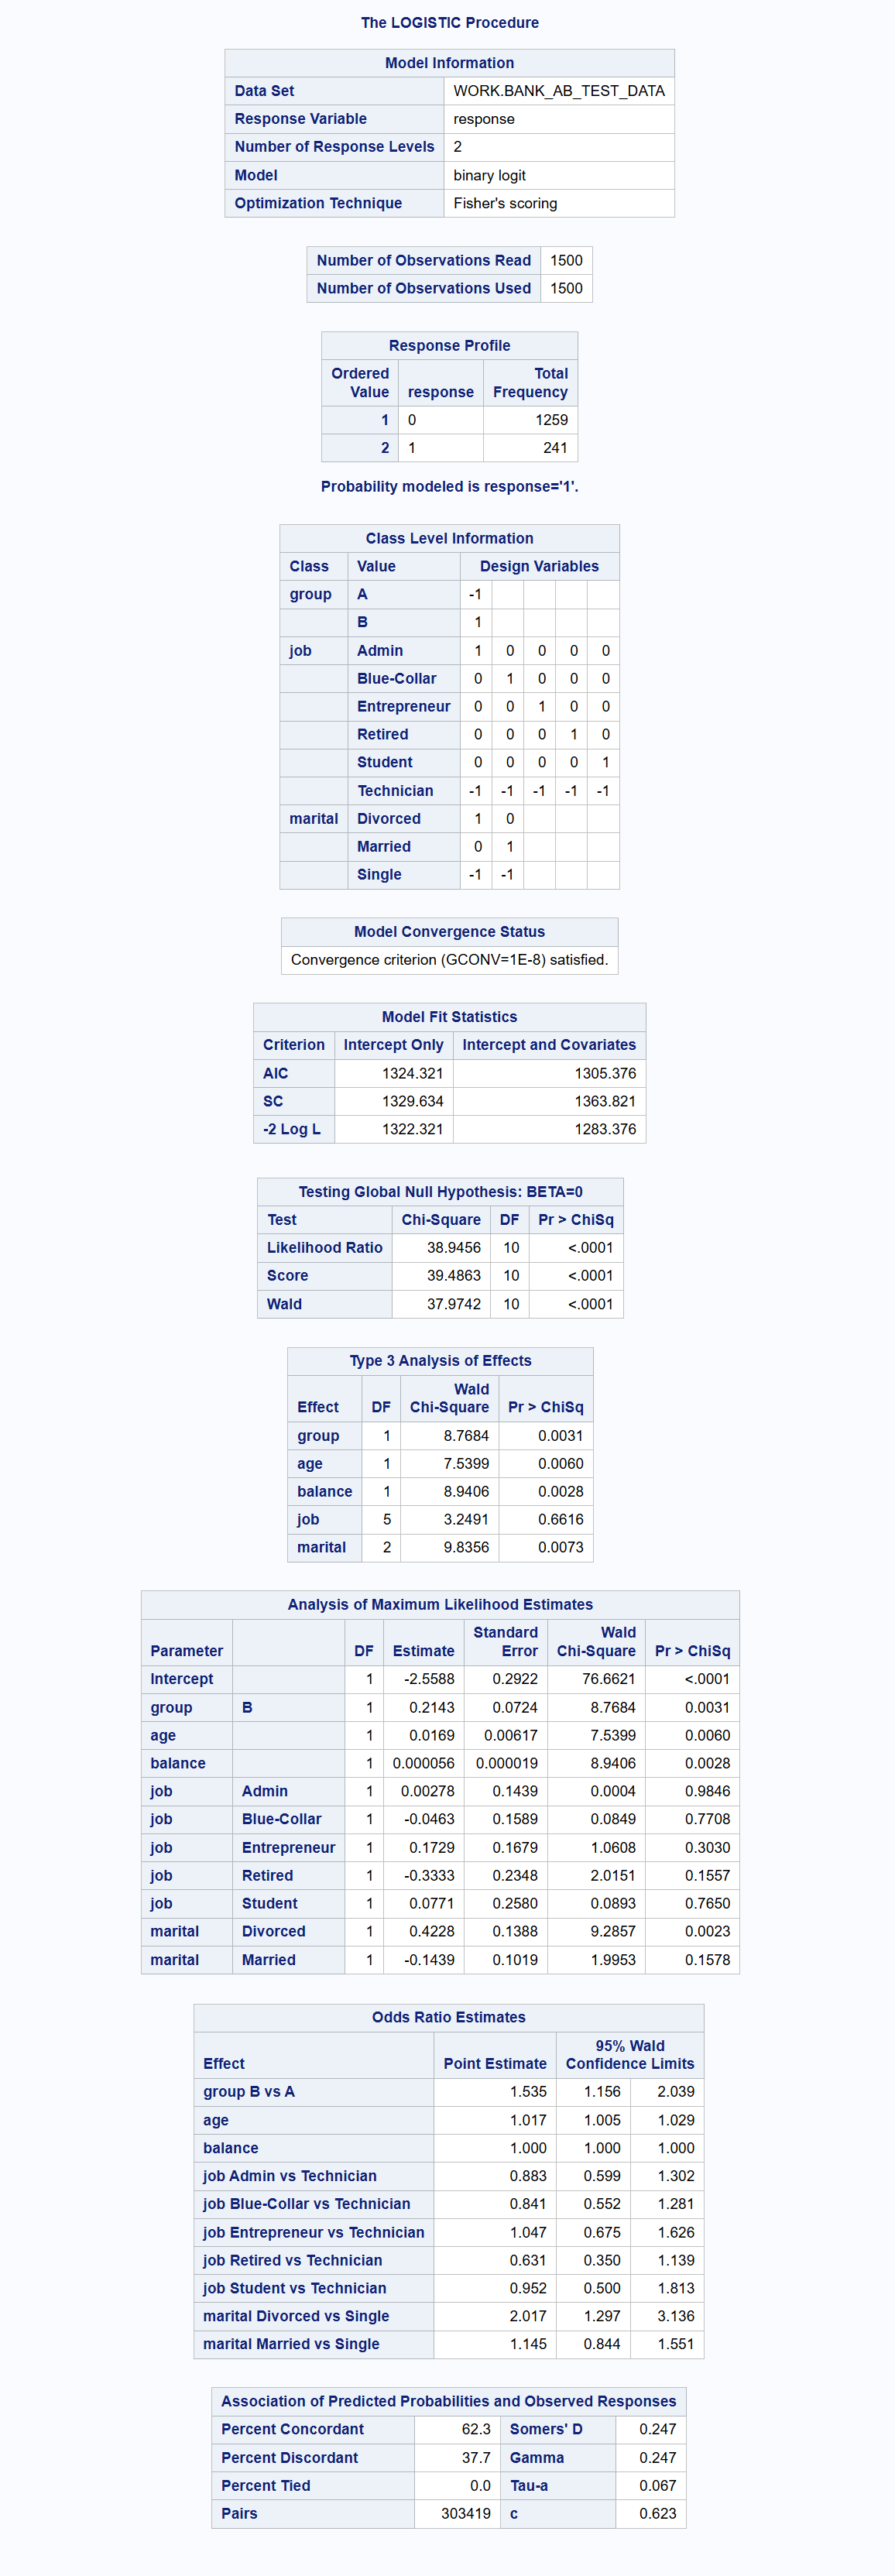